sdi1600042 Eleftherios Dimitras

sdi1600119 Michael Xanthopoulos

In [55]:
import re
import pickle
import string
import gensim
import pandas            as pd
import matplotlib.pyplot as plt

from nltk                            import word_tokenize
from nltk.corpus                     import stopwords
from nltk.tokenize                   import TweetTokenizer
from nltk.stem.porter                import PorterStemmer
from wordcloud                       import WordCloud
from collections                     import Counter
from gensim.models                   import Word2Vec
from sklearn.manifold                import TSNE
from IPython.core.display            import HTML
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.model_selection         import train_test_split
from sklearn                         import svm
from sklearn.metrics                 import f1_score
from sklearn.neighbors               import KNeighborsClassifier

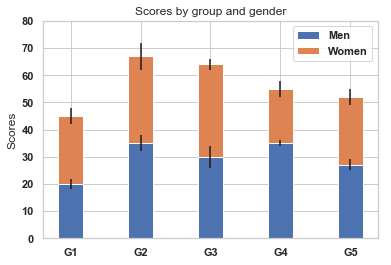

In [56]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

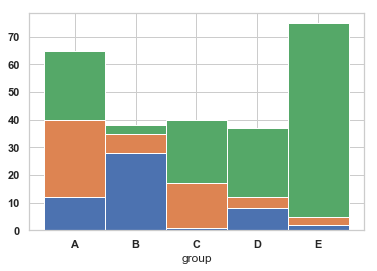

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [12, 28, 1, 8, 2]
bars2 = [28, 7, 16, 4, 2.9]
bars3 = [25, 3, 23, 25, 70]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, bottom=None, edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()

In [58]:
location = './crime.csv'
df = pd.read_csv(location , sep = "\t", header = None)

Tokenizing the tweets :

In [59]:
dict1 = {}
dict2 = {}
arr = [0,0,0,0,0]

dict1["0"] = [0,0,0,0,0]
dict2["1"] = [0,0,0,0,0]

dict1["0"][2]+=1

print(dict1)
print(dict2)

{'0': [0, 0, 1, 0, 0]}
{'1': [0, 0, 0, 0, 0]}


In [60]:
from collections import defaultdict

d = defaultdict(lambda: 0)

for i in range(1000):
    d[i % 10] += 1

for item in d.items():
    print(item)

(0, 100)
(1, 100)
(2, 100)
(3, 100)
(4, 100)
(5, 100)
(6, 100)
(7, 100)
(8, 100)
(9, 100)


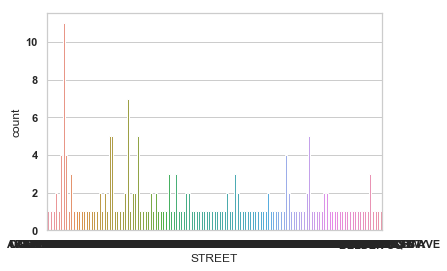

In [87]:
# for val in df.values:
#     print(val)
from numpy import array

dl = df.head(200).values.tolist()
# print(df.head(10).values)
tokens = []
for i,item in enumerate(dl): # remove enumerate()!!!!!!!!!!!!!!!!!!!!!
#     print(item[0])
    tokens.append(item[0].replace(', ,',',,').replace(', ','~~').replace(',"','"').replace('",','"').replace(',','"').replace('~~',', ').replace(')"',')').split('"'))
# print(tokens)
# for tok in tokens:
#     print(tok)
arr = array([tok for tok in tokens])
# print(arr)
dataframe_dict = {}
labels = []
for i,item in enumerate(arr):
    if i == 0:
        for label in item:
            dataframe_dict[label] = []
            labels.append(label)
    else:
        for i,col in enumerate(item):
            tmp_list = dataframe_dict[labels[i]]
            tmp_list.append(col)
            dataframe_dict[labels[i]] = tmp_list
        
#     print(item)
dlf = pd.DataFrame(dataframe_dict)
ax = sns.countplot(x="STREET", data=dlf)

In [ ]:
# ndf = df.head(29) #takes the first x entries

# dl = ndf.values.tolist()
from collections import defaultdict

dl = df.values.tolist()

crimes    = defaultdict(lambda: 0)
years     = defaultdict(lambda: 0)
months    = defaultdict(lambda: 0)
days      = defaultdict(lambda: 0)
districts = defaultdict(lambda: 0)

bars_yr   = defaultdict(lambda: 0)
bars_mn   = defaultdict(lambda: 0)
bars_da   = defaultdict(lambda: 0)
bars_di   = defaultdict(lambda: 0)

tokens = []
for i,item in enumerate(dl): # remove enumerate()!!!!!!!!!!!!!!!!!!!!!
#     if i in (15,19):
#         print(item[0].replace(', ,',',,').replace(', ','~~').replace(',"','"').replace('",','"').replace(',','"').replace('~~',', '))
#         print(item)
    tokens.append(item[0].replace(', ,',',,').replace(', ','~~').replace(',"','"').replace('",','"').replace(',','"').replace('~~',', ').split('"'))
# print('\n')
cr_cnt=0
yr_cnt=0
mn_cnt=0
da_cnt=0
di_cnt=0
for tok in tokens:
#     if i in (15,19):
#         print(tok)
#     print(tok[3],tok[8],tok[9],tok[10])
    bars_yr[tok[3]] = None
    bars_mn[tok[3]] = None
    bars_da[tok[3]] = None
    bars_di[tok[3]] = None

    if tok[3] not in crimes.keys():
        crimes[tok[3]] = cr_cnt
        cr_cnt += 1
    
    if tok[8] not in years.keys():
        years[tok[8]] = yr_cnt
        yr_cnt += 1
        
    if tok[9] not in months.keys():
        months[tok[9]] = mn_cnt
        mn_cnt += 1
        
    if tok[10] not in days.keys():
        days[tok[10]] = da_cnt
        da_cnt += 1
    
#     if tok[13] not in districts.keys():
    if tok[13] == '':
        if 'N/A' not in districts.keys():
            districts['N/A'] = di_cnt
            di_cnt += 1
    elif tok[13] not in districts.keys():
        districts[tok[13]] = di_cnt
        di_cnt += 1
        
        
for item in crimes:
    bars_yr[item] = [0 for i in years.keys()]
    bars_mn[item] = [0 for i in months.keys()]
    bars_da[item] = [0 for i in days.keys()]
    bars_di[item] = [0 for i in districts.keys()]
    
# init_bars_cr = [0 for i in crimes.keys()]
# init_bars_yr = [0 for i in years .keys()]
# init_bars_mn = [0 for i in months.keys()]
# init_bars_da = [0 for i in days  .keys()]

# The position of the bars on the x-axis
x_axis_cr = [i for i,_ in enumerate(crimes   .keys())]
x_axis_yr = [i for i,_ in enumerate(years    .keys())]
x_axis_mn = [i for i,_ in enumerate(months   .keys())]
x_axis_da = [i for i,_ in enumerate(days     .keys())]
x_axis_di = [i for i,_ in enumerate(districts.keys())]

# Names of group
label_names_cr = [key for key in crimes   .keys()]
label_names_yr = [key for key in years    .keys()]
label_names_mn = [key for key in months   .keys()]
label_names_da = [key for key in days     .keys()]
label_names_di = [key for key in districts.keys()]

for tok in tokens:
#     print(crimes[tok[3]])
#     print(tok[3])
    bars_yr[tok[3]][years[tok[8]]]      += 1
    bars_mn[tok[3]][months[tok[9]]]     += 1
    bars_da[tok[3]][days[tok[10]]]      += 1
    if tok[13] == '':
        bars_di[tok[3]][districts['N/A']]   += 1
    else:
        bars_di[tok[3]][districts[tok[13]]] += 1

bars = [0 for i in years.keys()]
barWidth = 1
legends_yr = []
for key,val in bars_yr.items():
#     print(key,val)
    pl = plt.bar(x_axis_yr, val, bottom=bars, edgecolor='white', width=barWidth)
    legends_yr.append(pl)
    bars = np.add(bars,val).tolist()

# plt.figure(figsize=(8, 6))
plt.xticks(x_axis_yr, label_names_yr, fontweight='bold')
plt.legend((pl[0] for pl in legends_yr), (crime for crime in crimes), bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gca().transAxes)
plt.show()

    
bars = [0 for i in months.keys()]
legends_mn = []
for key,val in bars_mn.items():
#     print(key,val)
    pl = plt.bar(x_axis_mn, val, bottom=bars, edgecolor='white', width=barWidth)
    legends_mn.append(pl)
    bars = np.add(bars,val).tolist()

plt.xticks(x_axis_mn, label_names_mn, fontweight='bold')
plt.legend((pl[0] for pl in legends_mn), (crime for crime in crimes), bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gca().transAxes)
plt.show()

bars = [0 for i in days.keys()]
legends_da = []
for key,val in bars_da.items():
#     print(key,val)
    pl = plt.bar(x_axis_da, val, bottom=bars, edgecolor='white', width=barWidth)
    legends_da.append(pl)
    bars = np.add(bars,val).tolist()

plt.xticks(x_axis_da, label_names_da, fontweight='bold', rotation=45)
plt.legend((pl[0] for pl in legends_da), (crime for crime in crimes), bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gca().transAxes)
plt.show()

    
bars = [0 for i in districts.keys()]
legends_di = []
for key,val in bars_di.items():
#     print(key,val)
    pl = plt.bar(x_axis_di, val, bottom=bars, edgecolor='white', width=barWidth)
    legends_di.append(pl)
    bars = np.add(bars,val).tolist()

plt.xticks(x_axis_di, label_names_di, fontweight='bold', rotation=90)
plt.legend((pl[0] for pl in legends_di), (crime for crime in crimes), bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gca().transAxes)
plt.show()

# plt.bar(r, bars1, edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
# plt.bar(r, bars2, bottom=bars1, edgecolor='white', width=barWidth)
# Create green bars (top)
# plt.bar(r, bars3, bottom=bars, edgecolor='white', width=barWidth)
 
# Custom X axis
# plt.xticks(x_axis_yr, label_names_yr, fontweight='bold')
# plt.xlabel("group")
# ax = plt.gca()
# plt.legend((pl[0] for pl in legends_yr), (crime for crime in crimes), bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gca().transAxes)
# plt.legend((pl[0] for pl in legend), (crime for crime in crimes))

 
# Show graphic
# plt.show()

# for item in years.items():
#     print(item)
# for item in months.items():
#     print(item)
# for item in days.items():
#     print(item)
# for item in districts.items():
#     print(item)

# for cr in crimes:
#     print(cr)

# # for i in days.items():
# #     print(i)
# # print(init_bars_cr)
# # print(init_bars_yr)
# # print(init_bars_mn)
# # print(init_bars_da)

# # for tok in tokens:
# #     if tok[8] not in crimes_per_year.keys():
# #         crimes_per_year[tok[8]] = [tok[3]]
# #     else:
# #         prev_list = crimes_per_year[tok[8]]
# #         prev_list.append(tok[3])
# #         crimes_per_year[tok[8]] = prev_list
        
# #     if tok[9] not in crimes_per_month.keys():
# #         crimes_per_month[tok[9]] = [tok[3]]
# #     else:
# #         prev_list = crimes_per_month[tok[9]]
# #         prev_list.append(tok[3])
# #         crimes_per_month[tok[9]] = prev_list
        
# #     if tok[10] not in crimes_per_day.keys():
# #         crimes_per_day[tok[10]] = [tok[3]]
# #     else:
# #         prev_list = crimes_per_day[tok[10]]
# #         prev_list.append(tok[3])
# #         crimes_per_day[tok[10]] = prev_list

# # for i in crimes_per_year.items():
# #     print(i)

# # for i in crimes_per_month.items():
# #     print(i)

# # for i in crimes_per_day.items():
# #     print(i)
    
# # # explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# # # fig = plt.figure(figsize=(18,10), dpi=500)
# # #2 rows 2 cols
# # #first row, first col
# # # ax1 = plt.subplot2grid((2,2),(0,0))
# # for i in crimes_per_year.items():
# #     plt.pie(i[1], labels=crimes_per_year.values(), autopct='%1.1f%%', startangle=140)
# # #     plt.title("Generally MCWs*", color = 'Blue')
# # # first row sec col
# # # ax1 = plt.subplot2grid((2,2), (0, 1))
# # # plt.pie(ps_data, explode=explode, labels=ps_labels, autopct='%1.1f%%', startangle=140)
# # # plt.title("MCWs* in Positive Posts", color = 'Green')
# # # #Second row first column
# # # ax1 = plt.subplot2grid((2,2), (1, 0))
# # # plt.pie(ng_data, explode=explode, labels=ng_labels, autopct='%1.1f%%', startangle=140)
# # # plt.title("MCWs* in Negative Posts", color = 'Red')
# # # #second row second column
# # # ax1 = plt.subplot2grid((2,2), (1, 1))
# # # plt.pie(nt_data, explode=explode, labels=nt_labels, autopct='%1.1f%%', startangle=140)
# # # plt.title("MCWs* in Neutral Posts", color = 'Grey')



In [52]:
import seaborn as sns
sns.set(style='whitegrid')
tips = sns.load_dataset("tips")
# print(tips.head())
# ax = sns.countplot(x="size", data=tips)
print(type(tips))
# print("TIPS = ",tips)
print(tips.values)
for tip in tips.values:
    print(type(tip))

<class 'pandas.core.frame.DataFrame'>
[[16.99 1.01 'Female' ... 'Sun' 'Dinner' 2]
 [10.34 1.66 'Male' ... 'Sun' 'Dinner' 3]
 [21.01 3.5 'Male' ... 'Sun' 'Dinner' 3]
 ...
 [22.67 2.0 'Male' ... 'Sat' 'Dinner' 2]
 [17.82 1.75 'Male' ... 'Sat' 'Dinner' 2]
 [18.78 3.0 'Female' ... 'Thur' 'Dinner' 2]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class

In [ ]:
# ndf = df.head(10) #takes the first x entries

# dl = ndf.values.tolist()

dl = df.values.tolist()

emotions    = []
positives   = []
negatives   = []
neutrals    = []
tokens      = []
fusedTokens = []
tknzr       = TweetTokenizer(preserve_case = False, 
                             strip_handles = True, 
                             reduce_len    = True)
for item in dl:
#     print("\nITEM = ",item)
    tweet = item[3]
    emotions.append(item[2])
#     if item[2] == "positive":
#         emotions.append(1)
#     elif item[2] == "negative":
#         emotions.append(-1)
#     elif item[2] == "neutral":
#         emotions.append(0)
    
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*' , '' , tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+' , '' , tweet)
 
    # remove hyperlinks
#     tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r"http\S+", "", tweet)
    
    # remove hashtags, removing the hash (#) sign only from the word
    tweet = re.sub(r'#' , '' , tweet)
    
    temp = tknzr.tokenize(tweet)
    
#     print("TEMP 1 = ",temp)
    
#     temp = [w.lower() for w in temp] #convert to lower case
    
    stop_words = stopwords.words('english')    #sets stop words
    newStopWords = ["i'm" , "he's" , "she's" , "it's" , "we're" , "you're" , "they're" , "via"]
    stop_words.extend(newStopWords)
    stop_words = set(stop_words)
    
    temp = [w for w in temp if not w in stop_words]  #removes stop words
#     print("TEMP 2 = ",temp)

    table = str.maketrans('', '', string.punctuation) #remove punctuation
    temp = [w.translate(table) for w in temp]
#     print("TEMP 3 = ",temp)

    temp = [word for word in temp if word.isalpha()] #remove remaining tokens that are not alphabetic
#     print("TEMP 4 = ",temp)

#     porter = PorterStemmer() #stemming (not that useful)
#     temp = [porter.stem(word) for word in temp]

    if item[2] == "positive":  #need to give the words positive and negative weight so that the most common words in positive posts is not "tomorrow"
        positives.extend(temp)
    elif item[2] == "negative":
        negatives.extend(temp)
    elif item[2] == "neutral":
        neutrals.extend(temp)
        
    fusedTokens.extend(temp)
    tokens.append(temp)
    
# print("\n\033[1;33mPrinting Tokens\033[0m")
# for i,tok in enumerate(tokens):
#     print("\033[1;34m->\033[0m",tok)
# print("\n\033[1;33mPrinting Fuzed Tokens\033[0m")
# print(fusedTokens)

In [ ]:
fz_count = Counter(fusedTokens)
# print("\033[1;33mGenerally most common words:\033[0m\n" , fz_count.most_common(10))

ps_count = Counter(positives)
# print("\033[1;33m\nMost common words found in positive posts:\033[0m\n" , ps_count.most_common(10))

ng_count = Counter(negatives)
# print("\033[1;33m\nMost common words found in negative posts:\033[0m\n" , ng_count.most_common(10))

nt_count = Counter(neutrals)
# print("\033[1;33m\nMost common words found in neutral posts:\033[0m\n" , nt_count.most_common(10))

#The data for the pie chart
fz_data   = []
fz_labels = []
for freq in fz_count.most_common(10):
    fz_labels.append(freq[0])
    fz_data.append(freq[1])

ps_data   = []
ps_labels = []
for freq in ps_count.most_common(10):
    ps_labels.append(freq[0])
    ps_data.append(freq[1])

ng_data   = []
ng_labels = []
for freq in ng_count.most_common(10):
    ng_labels.append(freq[0])
    ng_data.append(freq[1])

nt_data   = []
nt_labels = []
for freq in nt_count.most_common(10):
    nt_labels.append(freq[0])
    nt_data.append(freq[1])

# Data to plot
# labels = 'Python', 'C++', 'Ruby', 'Java'
# sizes = [215, 130, 245, 210]
# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

fig = plt.figure(figsize=(18,10), dpi=500)
#2 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(fz_data, explode=explode, labels=fz_labels, autopct='%1.1f%%', startangle=140)
plt.title("Generally MCWs*", color = 'Blue')
# first row sec col
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(ps_data, explode=explode, labels=ps_labels, autopct='%1.1f%%', startangle=140)
plt.title("MCWs* in Positive Posts", color = 'Green')
#Second row first column
ax1 = plt.subplot2grid((2,2), (1, 0))
plt.pie(ng_data, explode=explode, labels=ng_labels, autopct='%1.1f%%', startangle=140)
plt.title("MCWs* in Negative Posts", color = 'Red')
#second row second column
ax1 = plt.subplot2grid((2,2), (1, 1))
plt.pie(nt_data, explode=explode, labels=nt_labels, autopct='%1.1f%%', startangle=140)
plt.title("MCWs* in Neutral Posts", color = 'Grey')

# import numpy as np
# fig1 = plt.figure(figsize=(30,10), dpi=100)

# ax1 = plt.subplot2grid((2,2),(0,0))
# labels=[f'{x} {np.round(y/sum(fz_data)*100,1)}%' for x,y in fz_count.most_common(10)]
# ax1.pie(fz_data, labels=fz_labels, startangle=140, rotatelabels=True)  # No %
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# fig1 = plt.gcf()
# fig1.set_size_inches(5,5)
# circle = plt.Circle(xy=(0,0), radius=0.7, facecolor='white')
# plt.gca().add_artist(circle)
# plt.title("Generally MCWs*", color = 'Blue')

# ax1 = plt.subplot2grid((2,2),(0,1))
# labels=[f'{x} {np.round(y/sum(ps_data)*100,1)}%' for x,y in ps_count.most_common(10)]
# ax1.pie(ps_data, labels=ps_labels, startangle=140, rotatelabels=True)  # No %
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# fig1 = plt.gcf()
# fig1.set_size_inches(5,5)
# circle = plt.Circle(xy=(0,0), radius=0.7, facecolor='white')
# plt.gca().add_artist(circle)
# plt.title("MCWs* in Positive Posts", color = 'Green')

# ax1 = plt.subplot2grid((2,2),(1,0))
# labels=[f'{x} {np.round(y/sum(ng_data)*100,1)}%' for x,y in ng_count.most_common(10)]
# ax1.pie(ng_data, labels=ng_labels, startangle=140, rotatelabels=True)  # No %
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# fig1 = plt.gcf()
# fig1.set_size_inches(5,5)
# circle = plt.Circle(xy=(0,0), radius=0.7, facecolor='white')
# plt.gca().add_artist(circle)
# plt.title("MCWs* in Negative Posts", color = 'Red')

# ax1 = plt.subplot2grid((2,2),(1,1))
# labels=[f'{x} {np.round(y/sum(nt_data)*100,1)}%' for x,y in nt_count.most_common(10)]
# ax1.pie(nt_data, labels=nt_labels, startangle=140, rotatelabels=True)  # No %
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# fig1 = plt.gcf()
# fig1.set_size_inches(5,5)
# circle = plt.Circle(xy=(0,0), radius=0.7, facecolor='white')
# plt.gca().add_artist(circle)
# plt.title("MCWs* in Neutral Posts", color = 'Grey')

# plt.show();


# Plot
# plt.pie(data, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

# plt.axis('equal')
plt.show()
print("\033[1;33m*MCW = Most Common Words\033[0m")

In [ ]:
# count = Counter(fusedTokens)
# print("\033[1;33mGenerally most common words:\033[0m\n" , count.most_common(10))

# count = Counter(positives)
# print("\033[1;33m\nMost common words found in positive posts:\033[0m\n" , count.most_common(10))

# count = Counter(negatives)
# print("\033[1;33m\nMost common words found in negative posts:\033[0m\n" , count.most_common(10))

# count = Counter(neutrals)
# print("\033[1;33m\nMost common words found in neutral posts:\033[0m\n" , count.most_common(10))

In [ ]:
plt.figure(figsize=(18,10))

final = ""
for word in fusedTokens:
    final += " " + word
    
wc = WordCloud(background_color = "black", width = 640, height = 320).generate(final)

plt.subplot2grid((2,2),(0,0))
plt.imshow(wc)
plt.axis("off")
# plt.show()

# ----------------------------------------------------------#

final = ""
for word in positives:
    final += " " + word
    
wc = WordCloud(background_color = "red", width = 640, height = 320).generate(final)

plt.subplot2grid((2,2),(0,1))
plt.imshow(wc)
plt.axis("off")
# plt.show()

# ----------------------------------------------------------#

final = ""
for word in negatives:
    final += " " + word
    
wc = WordCloud(background_color = "green", width = 640, height = 320).generate(final)

plt.subplot2grid((2,2),(1,0))
plt.imshow(wc)
plt.axis("off")
# plt.show()

# ----------------------------------------------------------#

final = ""
for word in neutrals:
    final += " " + word
    
wc = WordCloud(background_color = "blue", width = 640, height = 320).generate(final)

plt.subplot2grid((2,2),(1,1))
plt.imshow(wc)
plt.axis("off")
plt.show()

Generally we can see that words like "love" appear in positive posts as expected , whereas "positive" words like "like" appear in negative posts . Also there are many neutral words like "tomorrow" that have the same distribution in both positive and negative posts.

Bag of words :

In [ ]:
newTokens = []
for item in tokens:
    final = ""
    for word in item:
        final += " " + word
#     print(final)
    newTokens.append(final)
    
# bow_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=100, stop_words='english')
bow_vectorizer = CountVectorizer(max_features=7000)
bow_xtrain = bow_vectorizer.fit_transform(newTokens)  #TWEETS : a list with the actual tweets 
# print(bow_vectorizer.get_feature_names())
# print(bow_xtrain.toarray())

# The output is a numpy array of features. The dimensionality of this array 
# depends on the number of TWEETS (shape should be number_of_tweets ∙ vocabulary_size) 
print(bow_xtrain.shape)

# filename = "bow.pkl"
outfile = open("bigbow.pkl" , "wb")
pickle.dump(bow_xtrain , outfile)
outfile.close()

TFIDF :

In [ ]:
# tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english') 
tfidf_vectorizer = TfidfVectorizer(max_features=7000)
tfidf = tfidf_vectorizer.fit_transform(newTokens)
print(tfidf.shape) #the output is a numpy array of features


# filename = "tfidf.pkl"
outfile = open("bigtfidf.pkl" , "wb")
pickle.dump(tfidf , outfile)
outfile.close()

W2V :

In [ ]:
# tokenized_tweet = tweets.apply(lambda x: x.split()) # tokenizing 

featuresSize = 300

model_w2v = gensim.models.Word2Vec(tokens,
                                   size      = featuresSize, # desired no. of features/independent variables
                                   window    = 5,  # context window size
                                   min_count = 2,
                                   sg        = 1,  # 1 for skip-gram model
                                   hs        = 0,
                                   negative  = 10, # for negative sampling
                                   workers   = 2,  # no.of cores
                                   seed      = 34) 

model_w2v.train(tokens, total_examples = len(tokens), epochs = 20)


In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model.wv.__getitem__(word))
        labels.append(word)
    
    tsne_model = TSNE(perplexity = 40, n_components = 2, init = 'pca', n_iter = 2500, random_state = 23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize = (16,16)) 
    
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i], xy = (x[i], y[i]), xytext = (5,2), textcoords = 'offset points', ha = 'right', va = 'bottom')
        
    plt.show()

In [ ]:
tsne_plot(model_w2v)

Adding dictionaries :

In [ ]:
dictNum  = 1
allDicts = []

dictLocation = "./lexica/generic/generic.txt"
file = open(dictLocation, "r")
genericDict = {}
for line in file:
    temp  = []
    count = 1
    for word in line.split():
        if count == 1:
            temp.append(word)
        else:
            temp.append(float(word))
        count += 1
    genericDict[temp[0]] = temp[1]
    
allDicts.extend([genericDict])

In [ ]:
# dictNum += 1

# dictLocation = "./lexica/emotweet/valence_tweet.txt"
# file = open(dictLocation, "r")
# vl_dic = []
# for line in file:
#     print(line)
#     temp = []
#     count = 1
#     for word in line.split():
#         print(word)
#         if count == 1:
#             temp.append(word)
#         else:
#             temp.append(float(word))
#         count += 1
#     vl_dic.extend([temp])
    
# allDicts.extend([vl_dic])

In [ ]:
dictNum += 1

dictLocation = "./lexica/affin/affin.txt"
file = open(dictLocation, "r")
af_dic = {}

for line in file:
    temp = []
    split_phrase = []

    for word in line.split():
        split_phrase.append(word)
    
    tmp_str = ""
    for ph_word in split_phrase[:-1]:
        if tmp_str == "":
            tmp_str += ph_word
        else:
            tmp_str += " " + ph_word
    
    temp.append(tmp_str)
    temp.append(float(split_phrase[-1]))

#     af_dic.extend([temp])
    af_dic[temp[0]] = temp[1]
    
allDicts.extend([af_dic])

In [ ]:
dictNum += 1

dictLocation = "./lexica/nrc/val.txt"
file = open(dictLocation, "r")
nrc_dic = {}

for line in file:
    temp = []
    split_phrase = []

    for word in line.split():
        split_phrase.append(word)
    
    tmp_str = ""
    for ph_word in split_phrase[:-1]:
        if tmp_str == "":
            tmp_str += ph_word
        else:
            tmp_str += " " + ph_word
    
    temp.append(tmp_str)
    temp.append(float(split_phrase[-1]))
    nrc_dic[temp[0]] = temp[1]
#     nrc_dic.extend([temp])
    
allDicts.extend([nrc_dic])

In [ ]:
dictNum += 1

dictLocation = "./lexica/nrctag/val.txt"
file = open(dictLocation, "r")
nrctag_dic = {}

for line in file:
    temp = []
    split_phrase = []

    for word in line.split():
        split_phrase.append(word)
    
    tmp_str = ""
    for ph_word in split_phrase[:-1]:
        if tmp_str == "":
            tmp_str += ph_word
        else:
            tmp_str += " " + ph_word
    
    temp.append(tmp_str)
    temp.append(float(split_phrase[-1]))
    nrctag_dic[temp[0]] = temp[1]
#     nrctag_dic.extend([temp])
    
allDicts.extend([nrctag_dic])

Making the tweet vectors and adding the dictionary values to them :

In [ ]:
word_vectors = model_w2v.wv
allTweetFeatsList = []
allTweetNoDict = []

for sentence in tokens:
#     print("\n",sentence)
    
    tweetFeatures = []
    tweetNod = []
    
    for i in range(0,featuresSize):
        value     = 0
        wordCount = 0
        
        for word in sentence:
            if word in word_vectors.vocab:
                wordCount += 1
                value     += word_vectors[word][i]
                
        if wordCount != 0:
            tweetFeatures.append(value / wordCount)
            tweetNod.append(value / wordCount)
        else:
            tweetFeatures.append(0)
            tweetNod.append(0)
    
    allTweetNoDict.extend([tweetNod])
    
    for dic in allDicts:
#         print(dic)
        value     = 0
        wordCount = 0

        for word in sentence:
#             print(word)
            if word in dic:
                wordCount += 1
                value     += dic[word]

        if wordCount != 0:
            tweetFeatures.append(value / wordCount)
        else:
            tweetFeatures.append(0)

# #         print(tweetFeatures , "\n")
    
            
    allTweetFeatsList.extend([tweetFeatures])

# filename = "wordEmbs.pkl"
outfile = open("bigwordEmbs.pkl" , "wb")
pickle.dump(allTweetFeatsList , outfile)
outfile.close()

outfile = open("bigwordEmbsNoDict.pkl" , "wb")
pickle.dump(allTweetNoDict , outfile)
outfile.close()

SVC with bag of words :

In [ ]:
infile = open("bigbow.pkl" , "rb")
bow_xtrain = pickle.load(infile)
infile.close()

# input for this method is any array of features
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow_xtrain, emotions, random_state = 42, test_size = 0.2)

In [ ]:
svcBow = svm.SVC(kernel = 'linear', C = 1, probability = True)

# xtrain_bow: bag of words features for train data
# ytrain: train data labels
svcBow = svcBow.fit(xtrain_bow, ytrain)

# probPrediction = svcBow.predict_proba(xvalid_bow) #predict on the validation set
prediction_int = svcBow.predict(xvalid_bow)
prediction_int = prediction_int.tolist()

# evaluate on the validation set
tmp_svm_bow_score = f1_score(yvalid, prediction_int, average = "micro")

In [ ]:
outfile = open("predbow.pkl" , "wb")
pickle.dump(tmp_svm_bow_score , outfile)
outfile.close()

SVC with TFIDF :

In [ ]:
infile = open("bigtfidf.pkl" , "rb")
tfidf = pickle.load(infile)
infile.close()

# input for this method is any array of features
xtrain, xvalid, ytrain, yvalid = train_test_split(tfidf , emotions, random_state = 42, test_size = 0.2)

In [ ]:
svcIdf = svm.SVC(kernel = 'linear', C = 1, probability = True)

# xtrain: tfidf features for train data
# ytrain: train data labels
svcIdf = svcIdf.fit(xtrain, ytrain) 

# probPrediction = svcIdf.predict_proba(xvalid) #predict on the validation set
prediction_int = svcIdf.predict(xvalid)
prediction_int = prediction_int.tolist()

# evaluate on the validation set
tmp_svm_tdidf_score = f1_score(yvalid, prediction_int, average = "micro")

In [ ]:
outfile = open("predtfidf.pkl" , "wb")
pickle.dump(tmp_svm_tdidf_score , outfile)
outfile.close()

SVC with W2V :

In [ ]:
infile = open("bigwordEmbs.pkl" , "rb")
allTweetFeatsList = pickle.load(infile)
infile.close()

# input for this method is any array of features
xtrain, xvalid, ytrain, yvalid = train_test_split(allTweetFeatsList , emotions, random_state = 42, test_size = 0.2)

In [ ]:
svcW2V = svm.SVC(kernel = 'linear', C = 1, probability = True)

# xtrain: word2vec features for train data
# ytrain: train data labels
svcW2V = svcW2V.fit(xtrain, ytrain)

# probPrediction = svcW2V.predict_proba(xvalid) #predict on the validation set
prediction_int = svcW2V.predict(xvalid)
prediction_int = prediction_int.tolist()

# evaluate on the validation set
tmp_svm_w2v_score = f1_score(yvalid, prediction_int , average = "micro")

In [ ]:
outfile = open("predwordEmbs.pkl" , "wb")
pickle.dump(tmp_svm_w2v_score , outfile)
outfile.close()

SVC with W2V while not using dictionaries :

In [ ]:
infile = open("bigwordEmbsNoDict.pkl" , "rb")
allTweetNod = pickle.load(infile)
infile.close()

# input for this method is any array of features
xtrain, xvalid, ytrain, yvalid = train_test_split(allTweetNod , emotions, random_state = 42, test_size = 0.2)

In [ ]:
svcW2V_Nod = svm.SVC(kernel = 'linear', C = 1, probability = True)

# xtrain: word2vec features for train data
# ytrain: train data labels
svcW2V_Nod = svcW2V_Nod.fit(xtrain, ytrain)

# probPrediction = svcW2V.predict_proba(xvalid) #predict on the validation set
prediction_int = svcW2V_Nod.predict(xvalid)
prediction_int = prediction_int.tolist()

# evaluate on the validation set
tmp_svm_w2v_score_nod = f1_score(yvalid, prediction_int , average = "micro")

In [ ]:
outfile = open("predwordEmbsNoDict.pkl" , "wb")
pickle.dump(tmp_svm_w2v_score_nod , outfile)
outfile.close()

Doing the same type of predictions with the test data :

In [ ]:
location = './twitter_data/test2017.tsv'
df = pd.read_csv(location , sep = "\t" , header = None)
emoLocation = './twitter_data/SemEval2017_task4_subtaskA_test_english_gold.txt'
emoFile = open(emoLocation, "r")
testEmotions = []
for line in emoFile:
    temp  = []
    count = 1
    for word in line.split():
        if count == 2:
            temp.append(word)
        count += 1
    testEmotions.extend(temp)

Tokenizing the tweets :

In [ ]:
# ndf = df.head(10) #takes the first x entries

# dl = ndf.values.tolist()

dl = df.values.tolist()

tokens      = []
fusedTokens = []
tknzr       = TweetTokenizer(preserve_case = False, 
                             strip_handles = True, 
                             reduce_len    = True)
for item in dl:
    tweet = item[3]
    
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*' , '' , tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+' , '' , tweet)
 
    # remove hyperlinks
    tweet = re.sub(r"http\S+", "", tweet)
    
    # remove hashtags, removing the hash (#) sign only from the word
    tweet = re.sub(r'#' , '' , tweet)
    
    temp = tknzr.tokenize(tweet)
    
    stop_words = stopwords.words('english')    #sets stop words
    newStopWords = ["i'm" , "he's" , "she's" , "it's" , "we're" , "you're" , "they're" , "via"]
    stop_words.extend(newStopWords)
    stop_words = set(stop_words)
    
    temp = [w for w in temp if not w in stop_words]  #removes stop words

    table = str.maketrans('', '', string.punctuation) #remove punctuation
    temp = [w.translate(table) for w in temp]
#     print("TEMP 3 = ",temp)
    temp = [word for word in temp if word.isalpha()] #remove remaining tokens that are not alphabetic

#     porter = PorterStemmer() #stemming (not that useful)
#     temp = [porter.stem(word) for word in temp]

    
    fusedTokens.extend(temp)
    tokens.append(temp)

Bag of words :

In [ ]:
newTokens = []
for item in tokens:
    final = ""
    for word in item:
        final += " " + word
    newTokens.append(final)
    
bow_xtest = bow_vectorizer.transform(newTokens)  #TWEETS : a list with the actual tweets 

# The output is a numpy array of features. The dimensionality of this array 
# depends on the number of TWEETS (shape should be number_of_tweets ∙ vocabulary_size) 
print(bow_xtest.shape)

outfile = open("testbow.pkl" , "wb")
pickle.dump(bow_xtest , outfile)
outfile.close()

TFIDF :

In [ ]:
tfidf = tfidf_vectorizer.transform(newTokens)
print(tfidf.shape) #the output is a numpy array of features


outfile = open("testtfidf.pkl" , "wb")
pickle.dump(tfidf , outfile)
outfile.close()

W2V :

In [ ]:
featuresSize = 300

model_w2v = gensim.models.Word2Vec(tokens,
                                   size      = featuresSize, # desired no. of features/independent variables
                                   window    = 5,  # context window size
                                   min_count = 2,
                                   sg        = 1,  # 1 for skip-gram model
                                   hs        = 0,
                                   negative  = 10, # for negative sampling
                                   workers   = 2,  # no.of cores
                                   seed      = 34) 

model_w2v.train(tokens, total_examples = len(tokens), epochs = 20)

In [ ]:
tsne_plot(model_w2v)

Modifying the vectors and adding the dictionary parameteres to them :

In [ ]:
word_vectors = model_w2v.wv
allTweetFeatsList = []
allTweetNoDict = []

for sentence in tokens:
#     print("\n",sentence)
    
    tweetFeatures = []
    tweetNod = []
    
    for i in range(0,featuresSize):
        value     = 0
        wordCount = 0
        
        for word in sentence:
            if word in word_vectors.vocab:
                wordCount += 1
                value     += word_vectors[word][i]
                
        if wordCount != 0:
            tweetFeatures.append(value / wordCount)
            tweetNod.append(value / wordCount)
        else:
            tweetFeatures.append(0)
            tweetNod.append(0)
    
    allTweetNoDict.extend([tweetNod])
    
    for dic in allDicts:
#         print(dic)
        value     = 0
        wordCount = 0

        for word in sentence:
#             print(word)
            if word in dic:
                wordCount += 1
                value     += dic[word]

        if wordCount != 0:
            tweetFeatures.append(value / wordCount)
        else:
            tweetFeatures.append(0)

# #         print(tweetFeatures , "\n")
    
            
    allTweetFeatsList.extend([tweetFeatures])

# filename = "wordEmbs.pkl"
outfile = open("testwordEmbs.pkl" , "wb")
pickle.dump(allTweetFeatsList , outfile)
outfile.close()

outfile = open("testwordEmbsNoDict.pkl" , "wb")
pickle.dump(allTweetNoDict , outfile)
outfile.close()

Prediction for test data BoW :

In [ ]:
infile = open("testbow.pkl" , "rb")
bow_xtest = pickle.load(infile)
infile.close()

In [ ]:
# probPrediction = svcBow.predict_proba(bow_xtrain) #predict on the validation set
prediction_int = svcBow.predict(bow_xtest)
prediction_int = prediction_int.tolist()
svm_bow_score = f1_score(testEmotions, prediction_int , average="micro") #evaluate on the validation set

In [ ]:
outfile = open("predtestbow.pkl" , "wb")
pickle.dump(svm_bow_score , outfile)
outfile.close()

Prediction for test data TFIDF :

In [ ]:
infile = open("testtfidf.pkl" , "rb")
tfidf = pickle.load(infile)
infile.close()

In [ ]:
# probPrediction = svcIdf.predict_proba(tfidf) #predict on the validation set
prediction_int = svcIdf.predict(tfidf)
prediction_int = prediction_int.tolist()

svm_tdidf_score = f1_score(testEmotions, prediction_int , average="micro") #evaluate on the validation set

In [ ]:
outfile = open("predtesttfidf.pkl" , "wb")
pickle.dump(svm_tdidf_score , outfile)
outfile.close()

Prediction for test data W2V :

In [ ]:
infile = open("testwordEmbs.pkl" , "rb")
allTweetFeatsList = pickle.load(infile)
infile.close()

In [ ]:
# probPrediction = svcW2V.predict_proba(allTweetFeatsList) #predict on the validation set
prediction_int = svcW2V.predict(allTweetFeatsList)
prediction_int = prediction_int.tolist()

svm_w2v_score = f1_score(testEmotions, prediction_int , average="micro") #evaluate on the validation set

In [ ]:
outfile = open("predtestwordEmbs.pkl" , "wb")
pickle.dump(svm_w2v_score , outfile)
outfile.close()

Prediction for test data W2V without the use of dictionaries :

In [ ]:
infile = open("testwordEmbsNoDict.pkl" , "rb")
allTweetNoDict = pickle.load(infile)
infile.close()

In [ ]:
# probPrediction = svcW2V.predict_proba(allTweetFeatsList) #predict on the validation set
prediction_int = svcW2V_Nod.predict(allTweetNoDict)
prediction_int = prediction_int.tolist()

svm_w2v_score_nod = f1_score(testEmotions, prediction_int , average="micro") #evaluate on the validation set

In [ ]:
outfile = open("predtestwordEmbsNoDict.pkl" , "wb")
pickle.dump(svm_w2v_score_nod , outfile)
outfile.close()

Setting up KNN and predicting by using the Bow data :

In [ ]:
infile = open("bigbow.pkl" , "rb")
bow_xtrain = pickle.load(infile)
infile.close()

In [ ]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(bow_xtrain , emotions)

In [ ]:
infile = open("testbow.pkl" , "rb")
bow_xtest = pickle.load(infile)
infile.close()

In [ ]:
prediction_knn = knn.predict(bow_xtest)
knn_bow_score = f1_score(testEmotions, prediction_knn , average="micro") #evaluate on the validation set

In [ ]:
outfile = open("knn_predtestbow.pkl" , "wb")
pickle.dump(knn_bow_score , outfile)
outfile.close()

Setting up KNN and predicting by using the TFIDF data :

In [ ]:
infile = open("bigtfidf.pkl" , "rb")
tfidf = pickle.load(infile)
infile.close()

In [ ]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(tfidf , emotions)

In [ ]:
infile = open("testtfidf.pkl" , "rb")
tfidf_new = pickle.load(infile)
infile.close()

In [ ]:
prediction_knn = knn.predict(tfidf_new)
knn_tdidf_score = f1_score(testEmotions, prediction_knn , average="micro") #evaluate on the validation set

In [ ]:
outfile = open("knn_predtesttfidf.pkl" , "wb")
pickle.dump(knn_tdidf_score , outfile)
outfile.close()

Setting up KNN and predicting by using the W2V data :

In [ ]:
infile = open("bigwordEmbs.pkl" , "rb")
w2v = pickle.load(infile)
infile.close()

In [ ]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(w2v , emotions)

In [ ]:
infile = open("testwordEmbs.pkl" , "rb")
w2v_new = pickle.load(infile)
infile.close()

In [ ]:
prediction_knn = knn.predict(w2v_new)
knn_w2v_score = f1_score(testEmotions, prediction_knn , average="micro") #evaluate on the validation set

In [ ]:
outfile = open("knn_predtestwordEmbs.pkl" , "wb")
pickle.dump(knn_w2v_score , outfile)
outfile.close()

Prediction by using W2V data without the use of dictionaries :

In [ ]:
infile = open("bigwordEmbsNoDict.pkl" , "rb")
w2v_NoDict = pickle.load(infile)
infile.close()

In [ ]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(w2v_NoDict , emotions)

In [ ]:
infile = open("testwordEmbsNoDict.pkl" , "rb")
w2v_new_nod = pickle.load(infile)
infile.close()

In [ ]:
prediction_knn = knn.predict(w2v_new_nod)
knn_w2v_score_nod = f1_score(testEmotions, prediction_knn , average="micro") #evaluate on the validation set

In [ ]:
outfile = open("knn_predtestwordEmbsNoDict.pkl" , "wb")
pickle.dump(knn_w2v_score_nod , outfile)
outfile.close()

The arrays with the success percentages of the algorithms used :

In [ ]:
infile = open("predtestbow.pkl" , "rb")
svm_bow_score = pickle.load(infile)
infile.close()
infile = open("predtesttfidf.pkl" , "rb")
svm_tfidf_score = pickle.load(infile)
infile.close()
infile = open("predtestwordEmbs.pkl" , "rb")
svm_w2v_score = pickle.load(infile)
infile.close()
infile = open("predtestwordEmbsNoDict.pkl" , "rb")
svm_w2v_score_nod = pickle.load(infile)
infile.close()

infile = open("knn_predtestwordEmbsNoDict.pkl" , "rb")
knn_bow_score = pickle.load(infile)
infile.close()
infile = open("knn_predtestwordEmbsNoDict.pkl" , "rb")
knn_tfidf_score = pickle.load(infile)
infile.close()
infile = open("knn_predtestwordEmbsNoDict.pkl" , "rb")
knn_w2v_score = pickle.load(infile)
infile.close()
infile = open("knn_predtestwordEmbsNoDict.pkl" , "rb")
knn_w2v_score_nod = pickle.load(infile)
infile.close()

In [ ]:
fig = plt.figure()
ax  = fig.add_subplot(111)

col_labels = ['Bow', 'Tf_idf', 'Word_Emb', 'Word_Emb\nwith dictionaries']
row_labels = ['SVM', 'KNN']
table_vals = [[str(float('%.2f'%(svm_bow_score * 100))) + "%", str(float('%.2f'%(svm_tfidf_score   * 100))) + "%", 
               str(float('%.2f'%(svm_w2v_score * 100))) + "%", str(float('%.2f'%(svm_w2v_score_nod * 100))) + "%"], 
              [str(float('%.2f'%(knn_bow_score * 100))) + "%", str(float('%.2f'%(knn_tfidf_score   * 100))) + "%", 
               str(float('%.2f'%(knn_w2v_score * 100))) + "%", str(float('%.2f'%(knn_w2v_score_nod * 100))) + "%"]]

# Draw table
the_table = plt.table(cellText  = table_vals,
                      colWidths = [0.1, 0.1, 0.12, 0.18],
                      rowLabels = row_labels,
                      colLabels = col_labels,
                      loc       = 'center'  ,
                      cellLoc   = 'center',
                      rowColours=('#FFFF00','#569857'),
                      colColours=("#321789","#321789","#321789","#321789"))

the_table.auto_set_font_size(False)
the_table.set_fontsize(24)
the_table.scale(4, 4)

cellDict = the_table.get_celld()
for i in range(0,len(col_labels)):
    cellDict[(0,i)].set_height(.3)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)

 BOW   TD_IDF WORD_EMB
SVM 51%     55%    42%
KNN 48%     48%    48%

Δεν πρόλαβε να ολοκληρώσει την εκτέλεση ώστε να φαίνονται όλα τα γραφήματα και τα charts. 
Ο παραπάνω πίνακας προέκυψε σε μια προηγούμενη εκτέλεση.
Έχει υλοποιηθεί και εκδοχή με word embeddings χωρίς dictionaries η οποία δεν πρόλαβε να 
ολκληρώσει την εκτέλεσή της και γι'αυτό δεν έχουμε ποσοστά έτοιμα.

Edit: Σωστή έκδοση του προγράμματος , η οποία τελείωσε την εκτέλεσή της